In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

2.9.1


In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
from tensorflow import keras

In [24]:
(X_train, y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
y_test.shape

(10000,)

In [29]:
X_train[0].shape #each img have (28, 28) pixels

(28, 28)

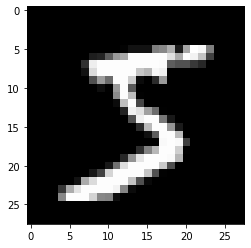

In [30]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [31]:
y_train[0]

5

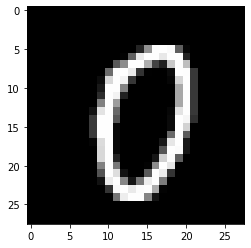

In [32]:
plt.imshow(X_train[1000], cmap = 'gray')
plt.show()

In [33]:
y_train[1000]

0

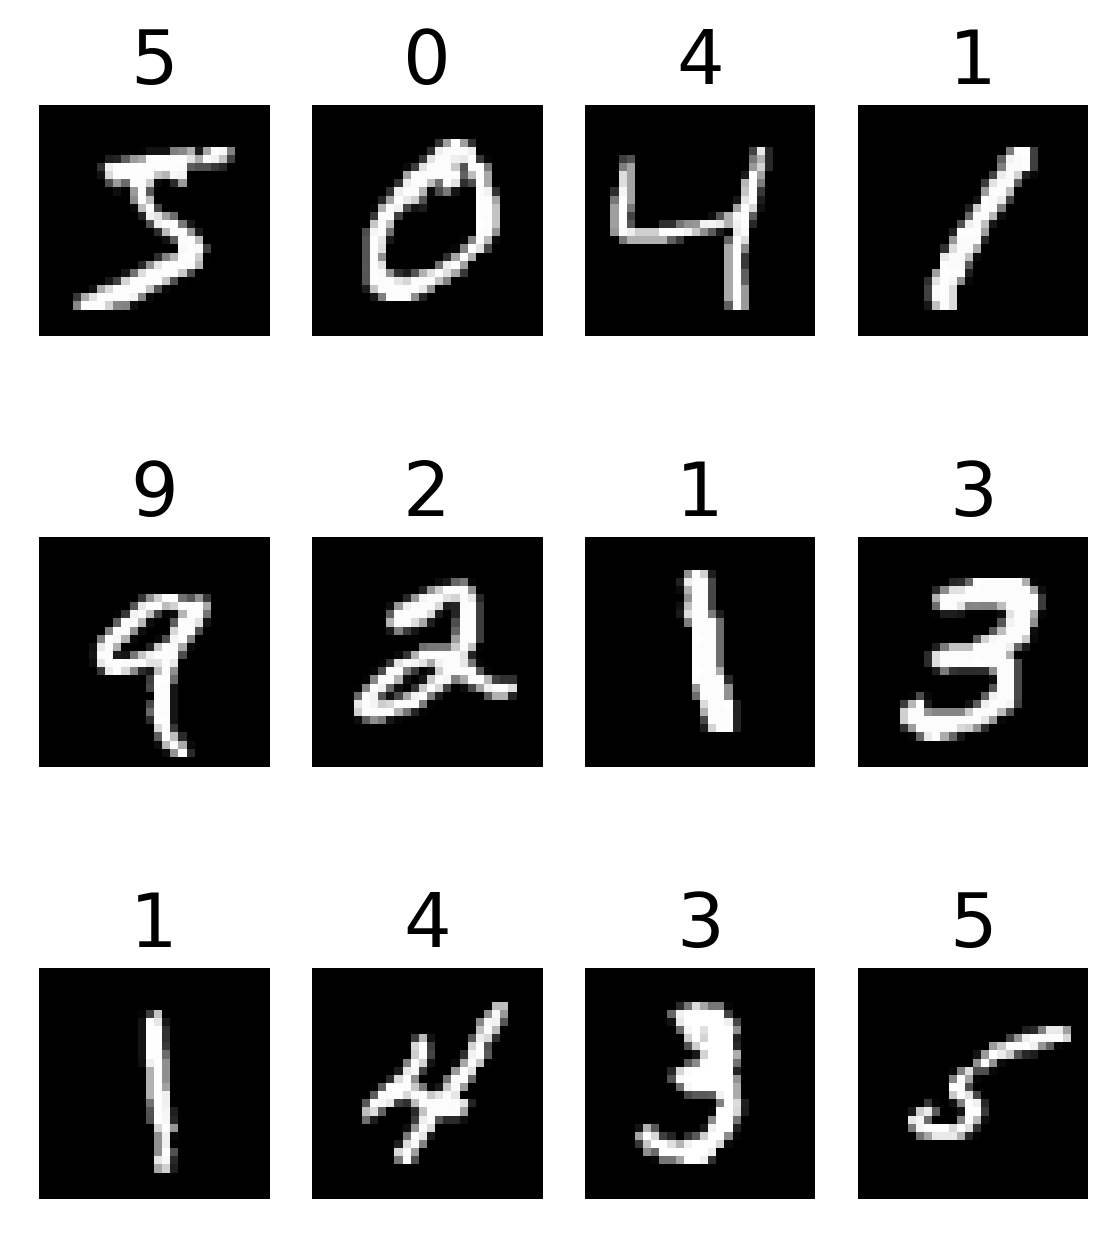

In [34]:
plt.figure(figsize =(5,6), dpi = 270)

for i in range(12):
    
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title('{}'.format(y_train[i]), fontsize = 20)
    plt.xticks([])
    plt.yticks([])



plt.show()

In [35]:
# checking the shape
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [37]:
# Precprocessing
X_train_flatten = X_train.reshape(60000, 784)
X_test_flatten = X_test.reshape(10000, 784)

In [46]:
# Dividing by 255.....normalizing the data
X_train, X_test = X_train/255, X_test/255

In [47]:
X_train_flatten.shape

(60000, 784)

In [48]:
X_test_flatten.shape

(10000, 784)

In [66]:
model = Sequential()
model.add(Dropout(0.2, seed=42, input_shape=(784,), name = 'm3_drop_out_1'))
model.add(Dense(128, activation='relu', name='m3_hidden1'))
model.add(Dropout(0.2, seed=42, name ='m3_drop_out_2' ))
model.add(Dense(64, activation='relu', name='m3_hidden2'))
model.add(Dense(15, activation='relu', name='m3_hidden3'))
model.add(Dense(10, activation='softmax', name='m3_output'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m3_drop_out_1 (Dropout)     (None, 784)               0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               100480    
                                                                 
 m3_drop_out_2 (Dropout)     (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m3_output (Dense)           (None, 10)                160       
                                                                 
Total params: 109,871
Trainable params: 109,871
Non-tr

In [68]:
history = model.fit(X_train_flatten, y_train,  epochs=10, verbose=1)
print(history.history.keys())

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4001 - accuracy: 0.2659
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3583 - accuracy: 0.4719
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9361 - accuracy: 0.6597
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5702 - accuracy: 0.8099
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3222 - accuracy: 0.9127
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2580 - accuracy: 0.9297
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2293 - accuracy: 0.9368
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2048 - accuracy: 0.9432
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1837 - accuracy: 0.9482
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.17

In [69]:
model.evaluate(X_train_flatten, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9759


[0.08652006834745407, 0.9758666753768921]

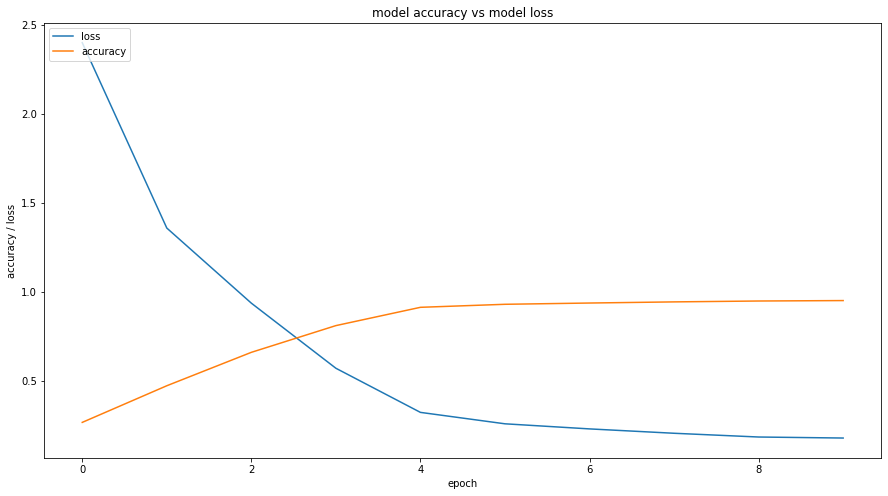

In [70]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [71]:
loss_and_metrics = model.evaluate(X_test_flatten, y_test, verbose=1)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1242 - accuracy: 0.9674
Test Loss 0.12424995005130768
Test Accuracy 0.9674000144004822


In [76]:
prediction = np.argmax(model.predict(X_test_flatten), axis = 1)
correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

313/313 [==============================] - 1s 2ms/step


In [77]:
type(prediction)

numpy.ndarray

In [78]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [79]:
prediction.shape

(10000,)

In [80]:
print(len(correct), ' :  classified correctly')
print(len(incorrect), '  : classified incorrectly')

9674  :  classified correctly
326   : classified incorrectly


In [81]:
from sklearn.metrics import confusion_matrix
import itertools
conf_matrix = confusion_matrix(y_true=y_test, y_pred=prediction)

In [82]:
conf_matrix

array([[ 970,    1,    1,    0,    0,    0,    5,    1,    2,    0],
       [   0, 1125,    1,    2,    0,    1,    4,    0,    2,    0],
       [   6,    1, 1001,    7,    0,    0,    5,    8,    3,    1],
       [   1,    2,   10,  968,    0,    6,    0,    5,   18,    0],
       [   0,    2,    4,    0,  939,    0,   18,    4,    1,   14],
       [   6,    0,    0,   15,    1,  845,   20,    0,    4,    1],
       [   3,    2,    0,    0,    0,    2,  950,    0,    1,    0],
       [   3,    1,   14,    2,    1,    0,    0,  994,    1,   12],
       [   4,    0,    5,    2,    2,    7,   13,    2,  934,    5],
       [   4,    5,    2,    4,   19,    0,    2,    5,   20,  948]],
      dtype=int64)

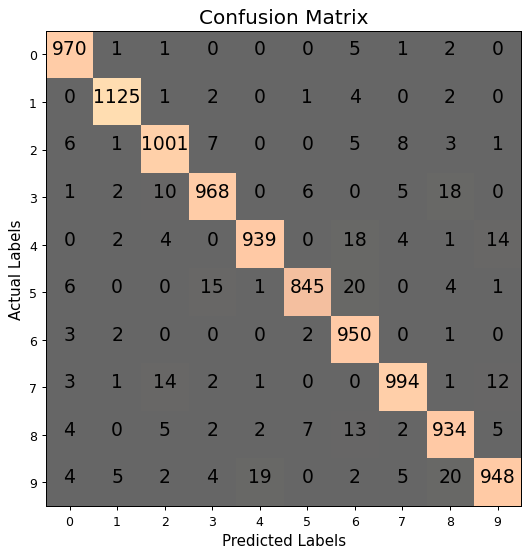

In [83]:

NR_CLASSES =10
LABEL_NAMES = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(7,7), dpi = 90)

plt.imshow(conf_matrix, cmap=plt.cm.copper, alpha = 0.6)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)



for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',color='black', fontsize = 15)

    

plt.show()

In [84]:
np.diag(conf_matrix) #true positives

array([ 970, 1125, 1001,  968,  939,  845,  950,  994,  934,  948],
      dtype=int64)

In [86]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.98979592, 0.99118943, 0.96996124, 0.95841584, 0.95621181,
       0.94730942, 0.99164927, 0.96692607, 0.95893224, 0.9395441 ])

In [87]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.97291876, 0.98770852, 0.96435453, 0.968     , 0.97609148,
       0.98141696, 0.93411996, 0.97546614, 0.94726166, 0.96636086])

In [88]:
avg_recall = np.mean(recall)
print(f'model 1 recall score is {avg_recall:.2%}')

model 1 recall score is 96.70%


In [89]:
avg_precision = np.mean(precision)
print(f'model 1 f score is {avg_precision:.2%}')

model 1 f score is 96.74%


In [91]:
f1_score = 2*(avg_precision*avg_recall) / (avg_precision + avg_recall)
print(f' model 1 f score is {f1_score:.2%}')

 model 1 f score is 96.72%
